In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [12]:
customer_data = pd.read_csv('customerdata4.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (10kkr),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
customer_data.describe()

,CustomerID,Age,Annual Income (10kkr),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Gender'>

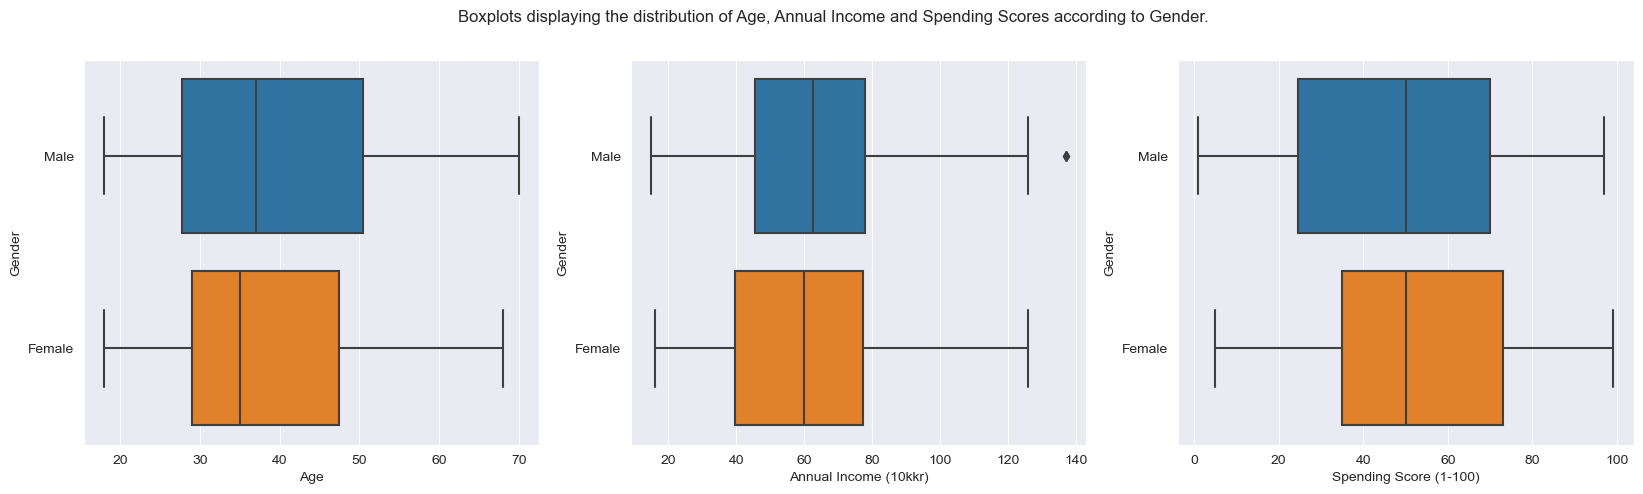

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Boxplots displaying the distribution of Age, Annual Income and Spending Scores according to Gender.')
sns.boxplot(ax=ax1, data=customer_data, x="Age", y="Gender")
sns.boxplot(ax=ax2, data=customer_data, x="Annual Income (10kkr)", y="Gender")
sns.boxplot(ax=ax3, data=customer_data, x="Spending Score (1-100)", y="Gender")

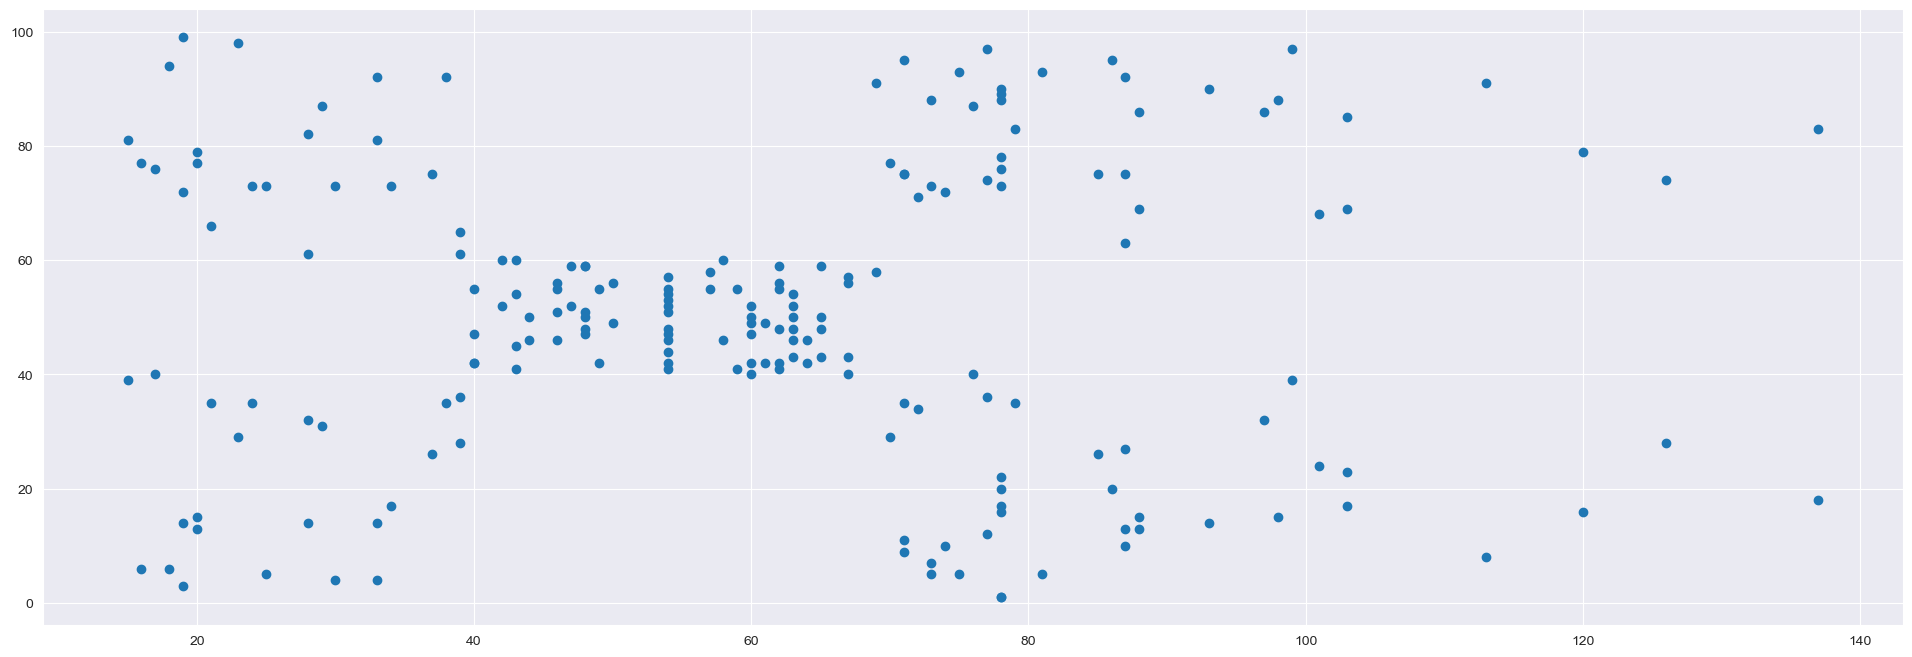

In [15]:
dropped = customer_data[['Spending Score (1-100)', 'Annual Income (10kkr)']]
data = np.array(dropped)
plt.figure(figsize=(24,8))
plt.scatter(data[:,1], data[:,0], label='True Position')
plt.show()

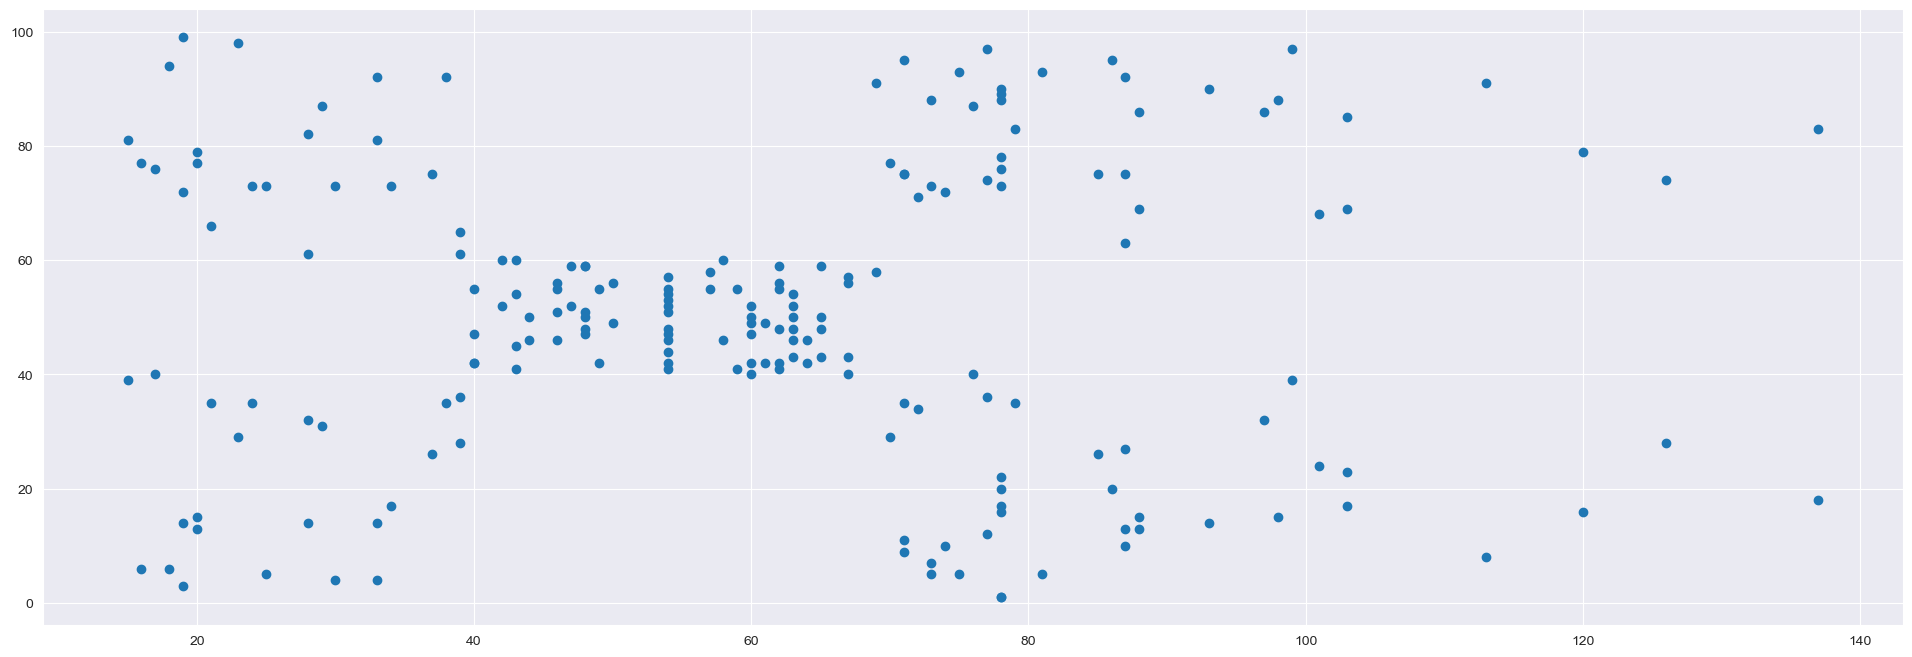

In [16]:
dropped = customer_data[['Spending Score (1-100)', 'Annual Income (10kkr)']]
data = np.array(dropped)
plt.figure(figsize=(24,8))
plt.scatter(data[:,1], data[:,0], label='True Position')
plt.show()

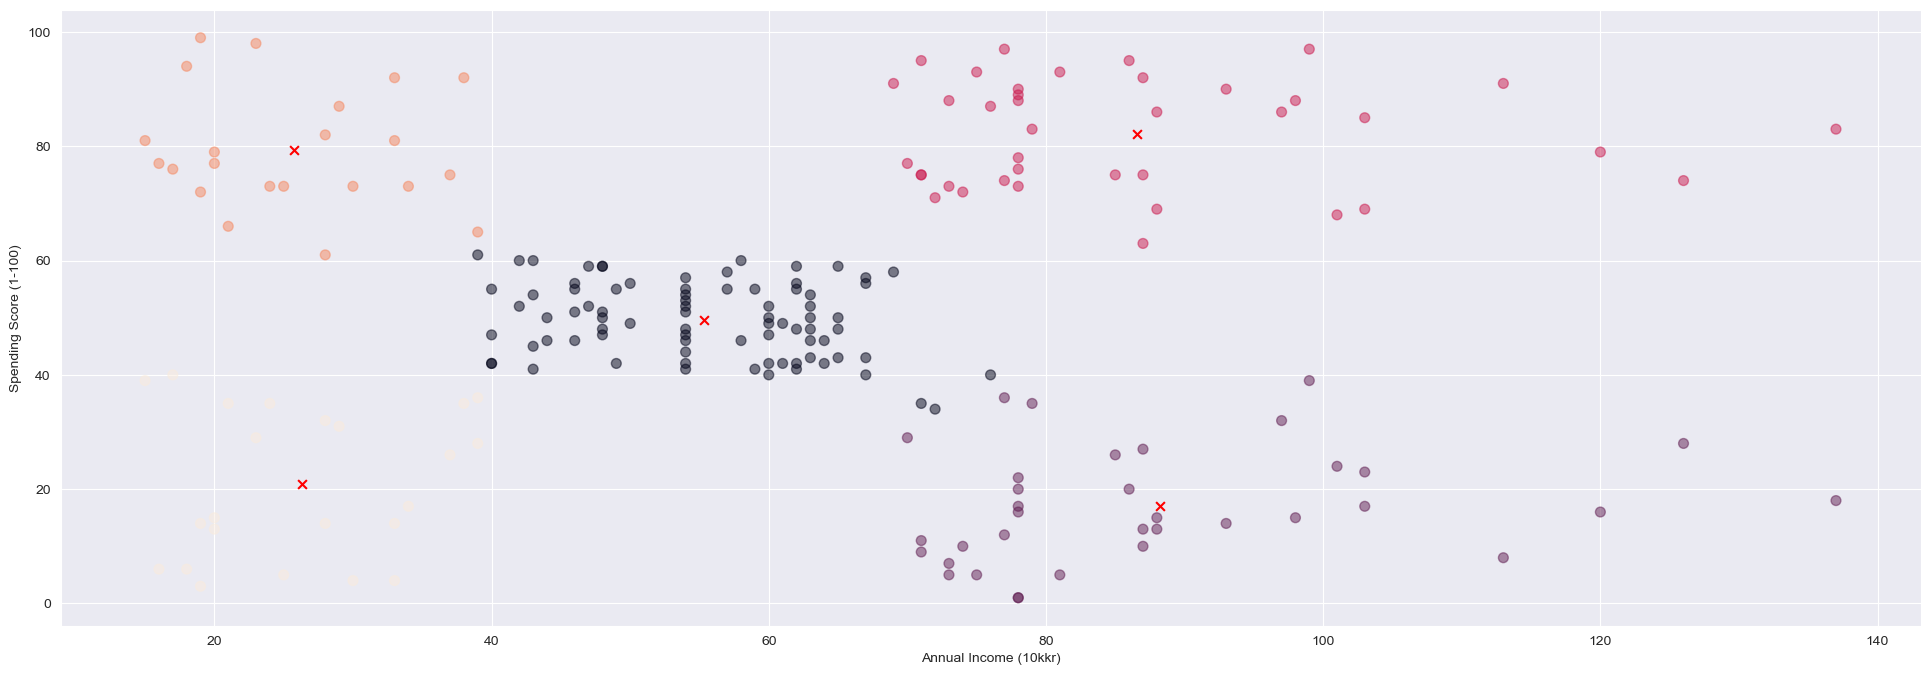

In [17]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++').fit(data)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(24,8))
plt.xlabel('Annual Income (10kkr)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(data[:,1], data[:,0], c=kmeans.labels_.astype (float), s=50, alpha=0.5)
plt.scatter(centroids[:,1], centroids[:,0], c='red', s=40, marker='x')
plt.show()

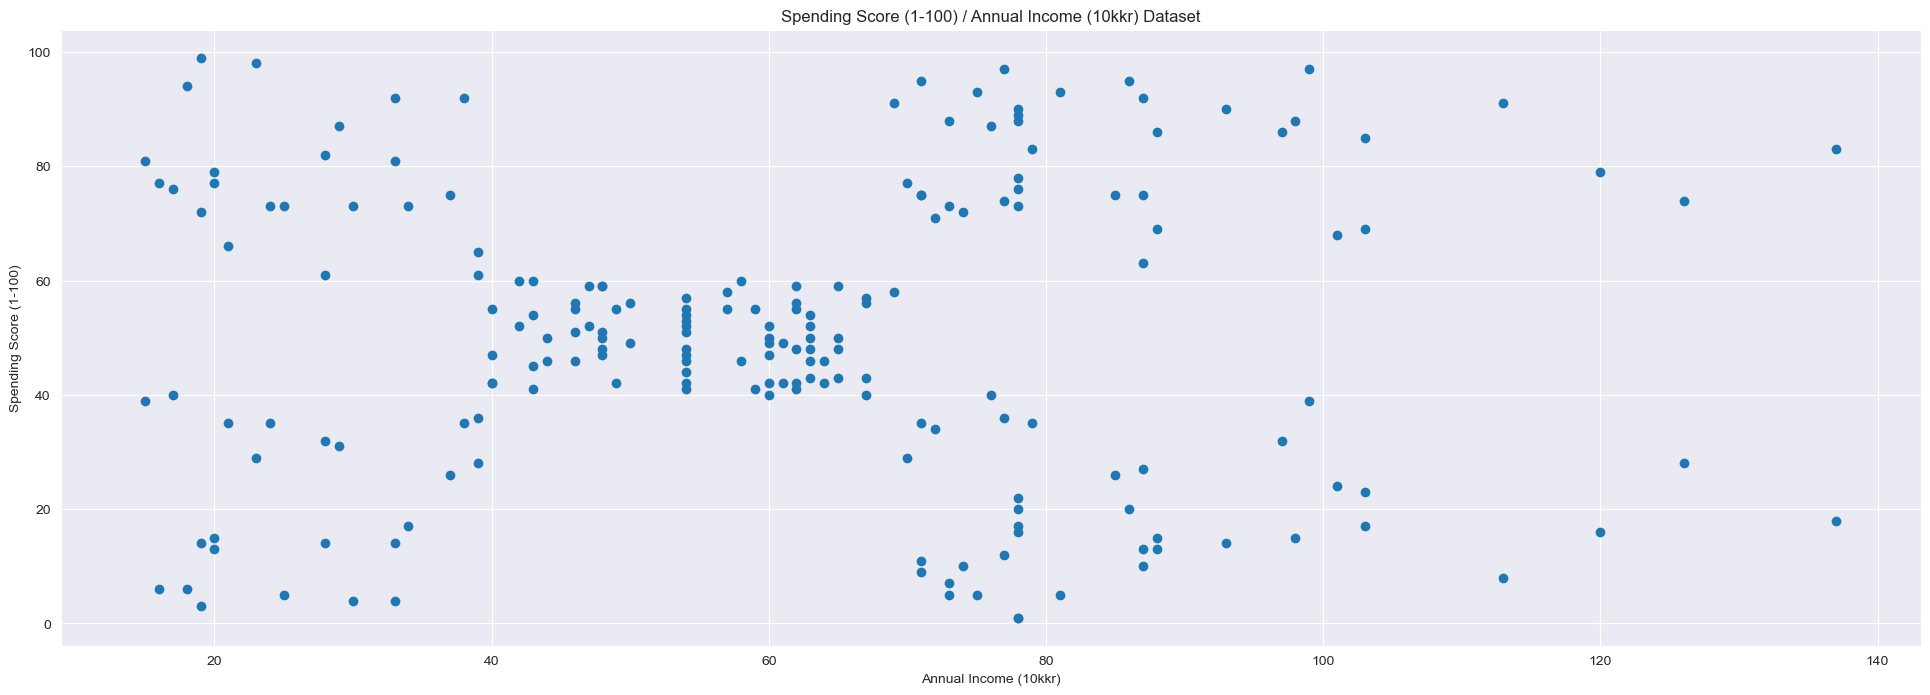

In [18]:
sse = []
x1 = np.array(data[:,0])
x2 = np.array(data[:,1])
plt.figure(figsize=(24,8))
plt.xlabel('Annual Income (10kkr)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) / Annual Income (10kkr) Dataset')
plt.scatter(x2, x1)
plt.show()

C:\Users\simon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Sum of Squared Distance')

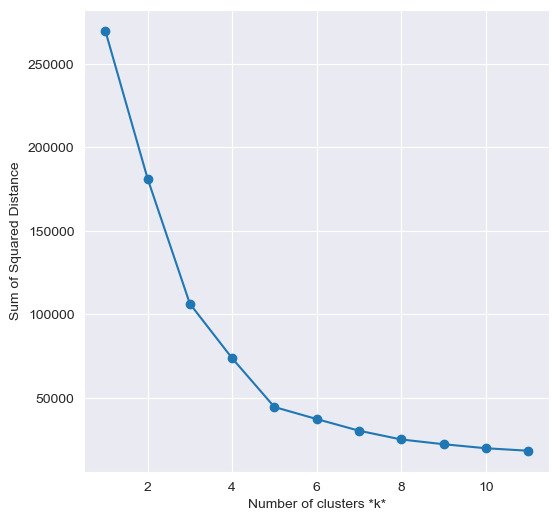

In [19]:
X = np.stack((x1[:], x2[:]), axis=-1)
k_list = list(range(1,12))
for k in k_list:
    km_model = KMeans(n_clusters=k)
    km_model.fit(X)
    sse.append(km_model.inertia_)

plt.figure(figsize=(6,6))
plt.plot(k_list, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of Squared Distance')